# Project 1- Decesion Tree for Fair Face Analysis Bias

In [1]:
import os
import sys

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data 
label_train = pd.read_csv("C:\\Users\\price\\Documents\\GitHub\\DATA6550-Bias\\Data\\fairface_label_train.csv")
label_val = pd.read_csv('C:\\Users\\price\\Documents\\GitHub\\DATA6550-Bias\\Data\\fairface_label_val.csv')

In [3]:
label_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          10954 non-null  object
 1   age           10954 non-null  object
 2   gender        10954 non-null  object
 3   race          10954 non-null  object
 4   service_test  10954 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 353.1+ KB


In [8]:
label_val.head()

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


In [4]:
label_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86744 entries, 0 to 86743
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          86744 non-null  object
 1   age           86744 non-null  object
 2   gender        86744 non-null  object
 3   race          86744 non-null  object
 4   service_test  86744 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 2.7+ MB


In [12]:
label_train

,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True
...,...,...,...,...,...
86739,train/86740.jpg,20-29,Male,Indian,True
86740,train/86741.jpg,10-19,Male,Indian,True
86741,train/86742.jpg,more than 70,Female,Indian,True
86742,train/86743.jpg,10-19,Female,Black,True


In [5]:
train_emb = pd.read_csv("C:\\Users\\price\\Downloads\\OneDrive_1_2-10-2026\\train_embeddings.csv")
test_emb = pd.read_csv("C:\\Users\\price\\Downloads\\OneDrive_1_2-10-2026\\test_embeddings.csv")

In [6]:
train_emb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86744 entries, 0 to 86743
Columns: 515 entries, feat_0 to race_gender
dtypes: float64(512), object(3)
memory usage: 340.8+ MB


In [7]:
train_emb.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_505,feat_506,feat_507,feat_508,feat_509,feat_510,feat_511,race,gender,race_gender
0,0.843073,0.103579,0.224522,0.000000,0.778184,0.027723,0.454252,0.303014,0.029440,0.200618,...,0.150238,0.323468,0.784020,1.181147,0.422497,0.239257,0.723814,east asian,male,east asian_male
1,0.180621,1.292241,0.971825,0.132645,0.015272,0.305211,0.422381,0.379263,0.054428,0.007033,...,0.650830,2.343723,0.182173,0.085612,1.129795,0.638840,0.099425,indian,female,indian_female
2,0.012478,0.151712,0.666835,0.229115,0.108760,0.079838,0.191968,0.000000,0.269209,0.378046,...,0.322626,1.649574,0.019350,0.490857,0.762305,0.825264,0.454207,black,female,black_female
3,0.175503,0.309288,1.302044,0.065322,0.318755,0.151344,0.223482,0.075722,0.164445,0.174925,...,0.501732,0.948112,1.632882,0.479979,0.363495,0.169139,0.768003,indian,female,indian_female
4,0.066143,0.208480,1.062915,0.474760,0.000000,0.000000,0.041315,0.009158,0.053300,0.624211,...,0.697677,2.309969,0.987021,0.091093,0.343762,0.901343,0.149076,indian,female,indian_female


In [10]:
test_emb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Columns: 515 entries, feat_0 to race_gender
dtypes: float64(512), object(3)
memory usage: 43.0+ MB


In [11]:
test_emb.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_505,feat_506,feat_507,feat_508,feat_509,feat_510,feat_511,race,gender,race_gender
0,0.065531,0.145638,0.666353,0.022759,0.020042,0.494037,0.391600,0.896950,0.297403,0.009280,...,0.562256,2.478459,0.285622,0.006262,1.124570,0.688017,0.039207,east asian,male,east asian_male
1,0.243451,1.143462,0.491546,0.010157,0.837501,0.255487,0.135047,0.386226,0.206483,0.125620,...,0.512902,1.975987,1.487281,0.463475,0.126804,0.581827,1.107382,east asian,female,east asian_female
2,2.700191,0.768331,0.186618,0.144938,0.226986,0.147554,0.203444,0.365457,0.118876,0.453851,...,1.817159,2.202756,0.292811,1.336264,0.928382,1.471213,1.068437,white,male,white_male
3,0.268805,0.398621,0.796091,0.180213,0.054708,0.198172,0.698923,0.067774,0.119012,0.025534,...,0.371233,2.206412,0.518856,0.860804,0.407948,0.261468,0.428787,latino_hispanic,female,latino_hispanic_female
4,1.209170,0.045833,0.066622,0.145954,0.043286,0.019625,0.327715,0.143074,0.195398,0.843317,...,1.100869,2.160444,0.204243,0.440574,0.637311,0.233427,1.096583,southeast asian,male,southeast asian_male


In [36]:
# train test split the data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [21]:
X = train_emb.drop(columns=['gender', 'race', 'race_gender'])
y = train_emb['gender']

In [24]:
y = pd.get_dummies(y, drop_first=True)

In [27]:
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X,y,test_size=.20, train_size=0.80, random_state=42)

In [40]:
dt = DecisionTreeClassifier(random_state=6500)
model_g =dt.fit(X_train_g, y_train_g)
model_g

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,6500
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [41]:
pred_g = model_g.predict(X_test_g)

In [44]:
print('Accuracy Score of Decsion Tree on Test Set: ',model_g.score(X_test_g, y_test_g))
print('Accuracy Score of Decsion Tree on Training Set: ',model_g.score(X_train_g, y_train_g))

Accuracy Score of Decsion Tree on Test Set:  0.6518531327454032
Accuracy Score of Decsion Tree on Training Set:  0.9999855897398948


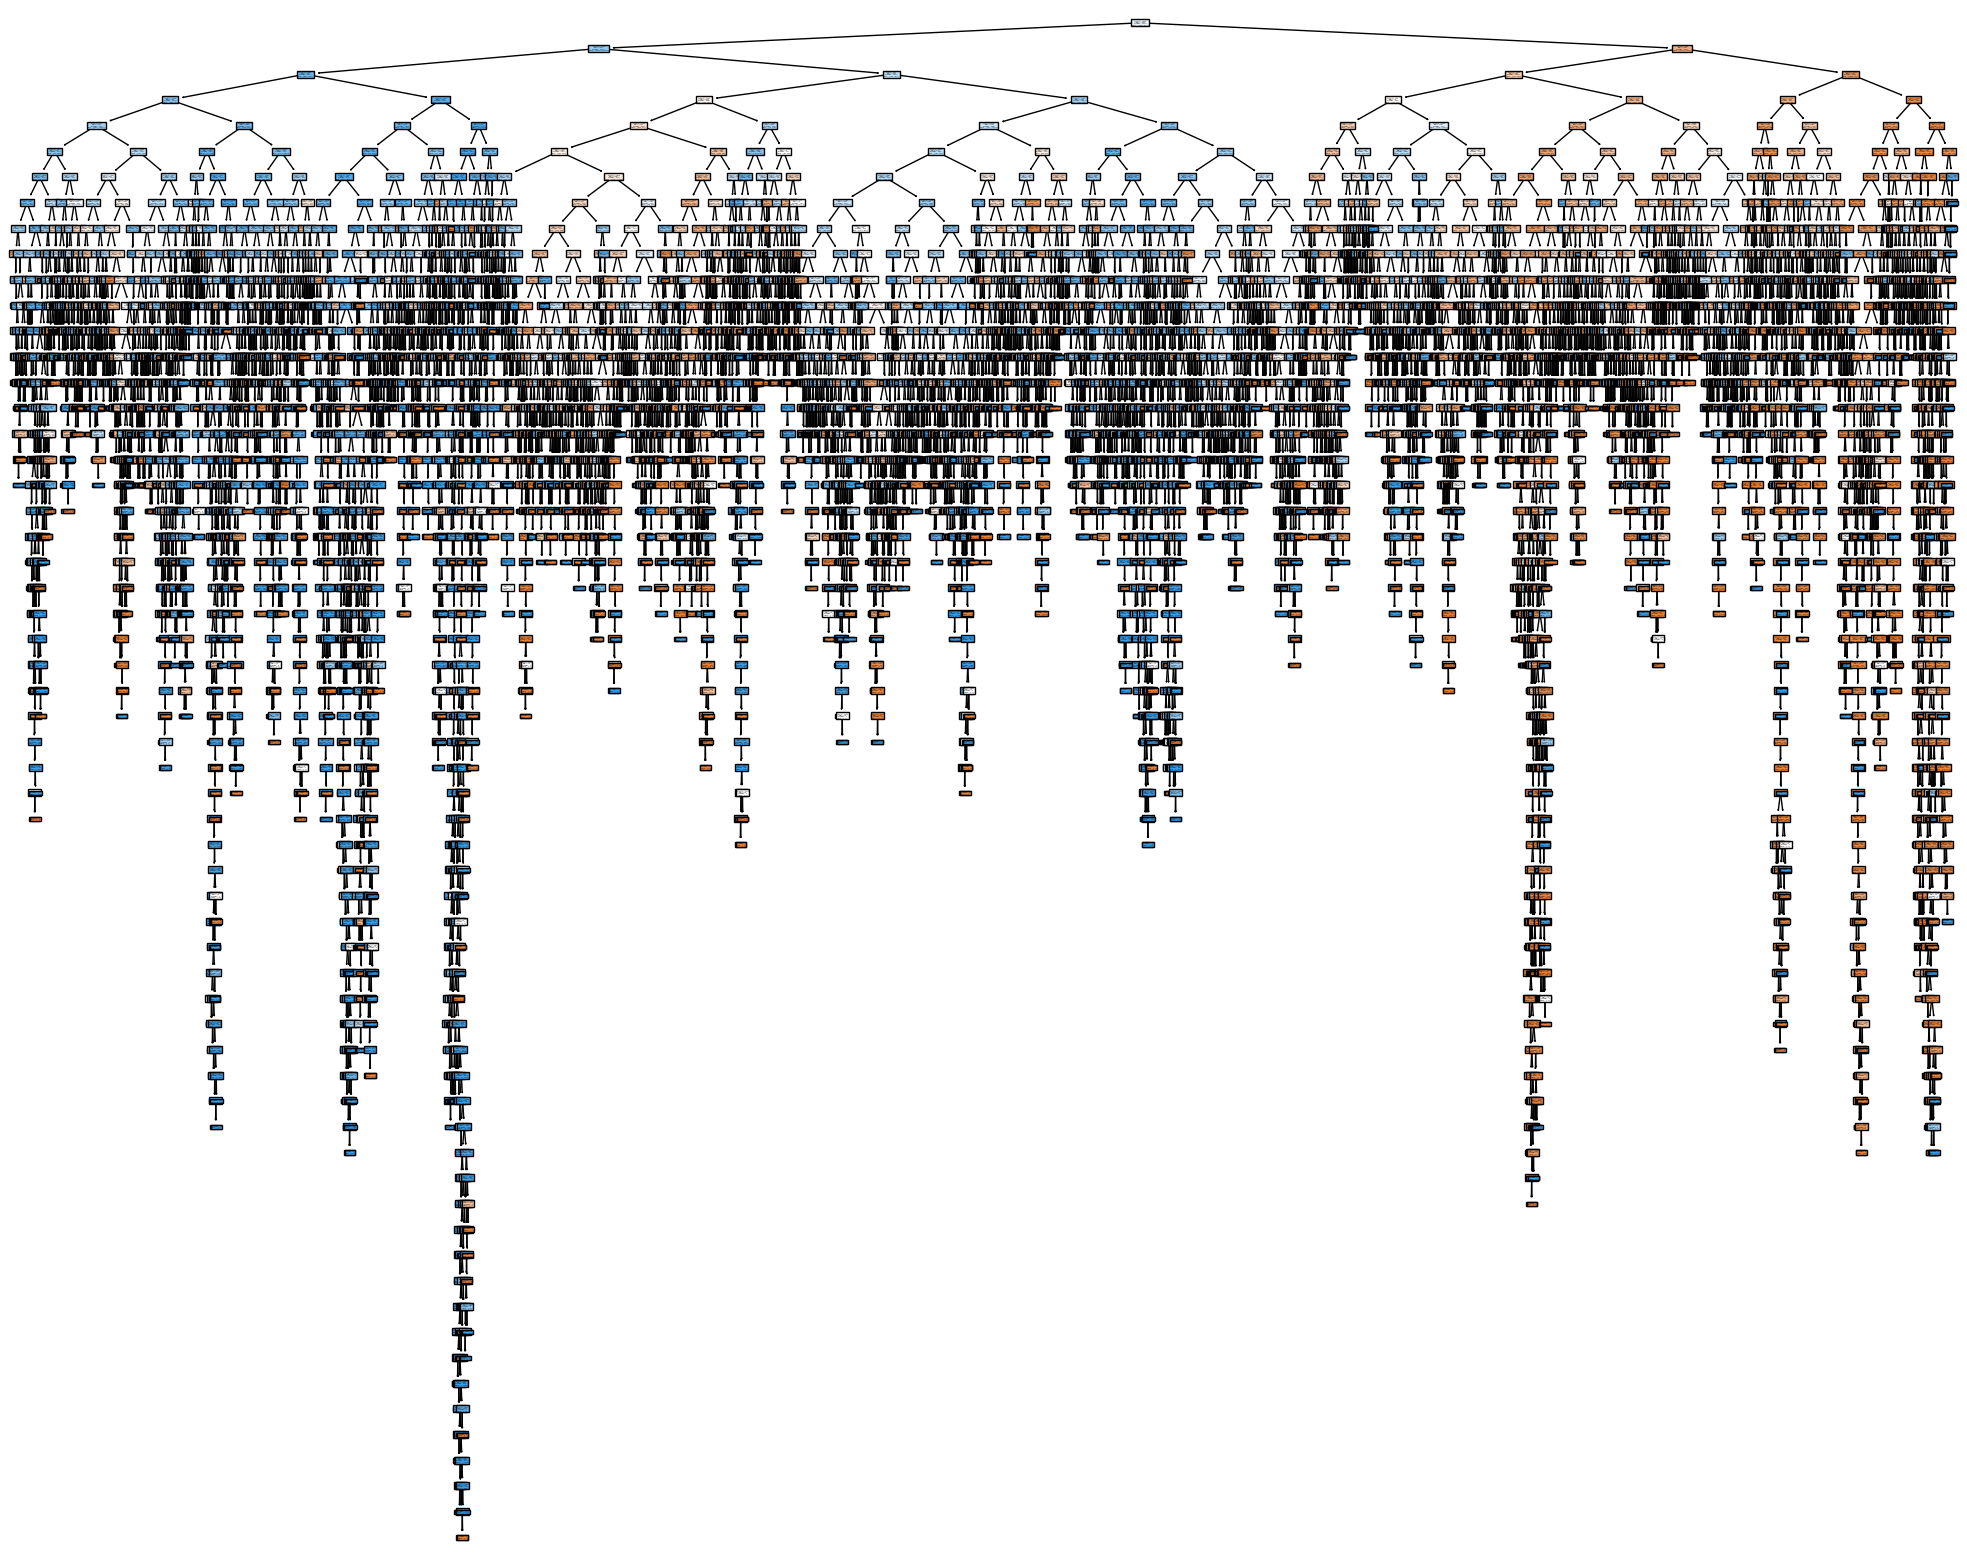

In [45]:
fig = plt.figure(figsize=(25,20))
_=plot_tree(model_g, filled=True)